In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as optimization

In [37]:
num_trading_day = 252
NUM_PORTFOLIO = 1000

In [20]:
stocks = ['AAPL','WMT','TSLA','GE','AMZN','DB']

start_date = '2010-01-01'
end_date = '2020-01-01'

def download_data():
    
    stock_data={}
    
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close'] 
        
    return pd.DataFrame(stock_data)
    


In [22]:
def show_data(data):
    data.plot(figsize=(20,10))
    plt.show()
    

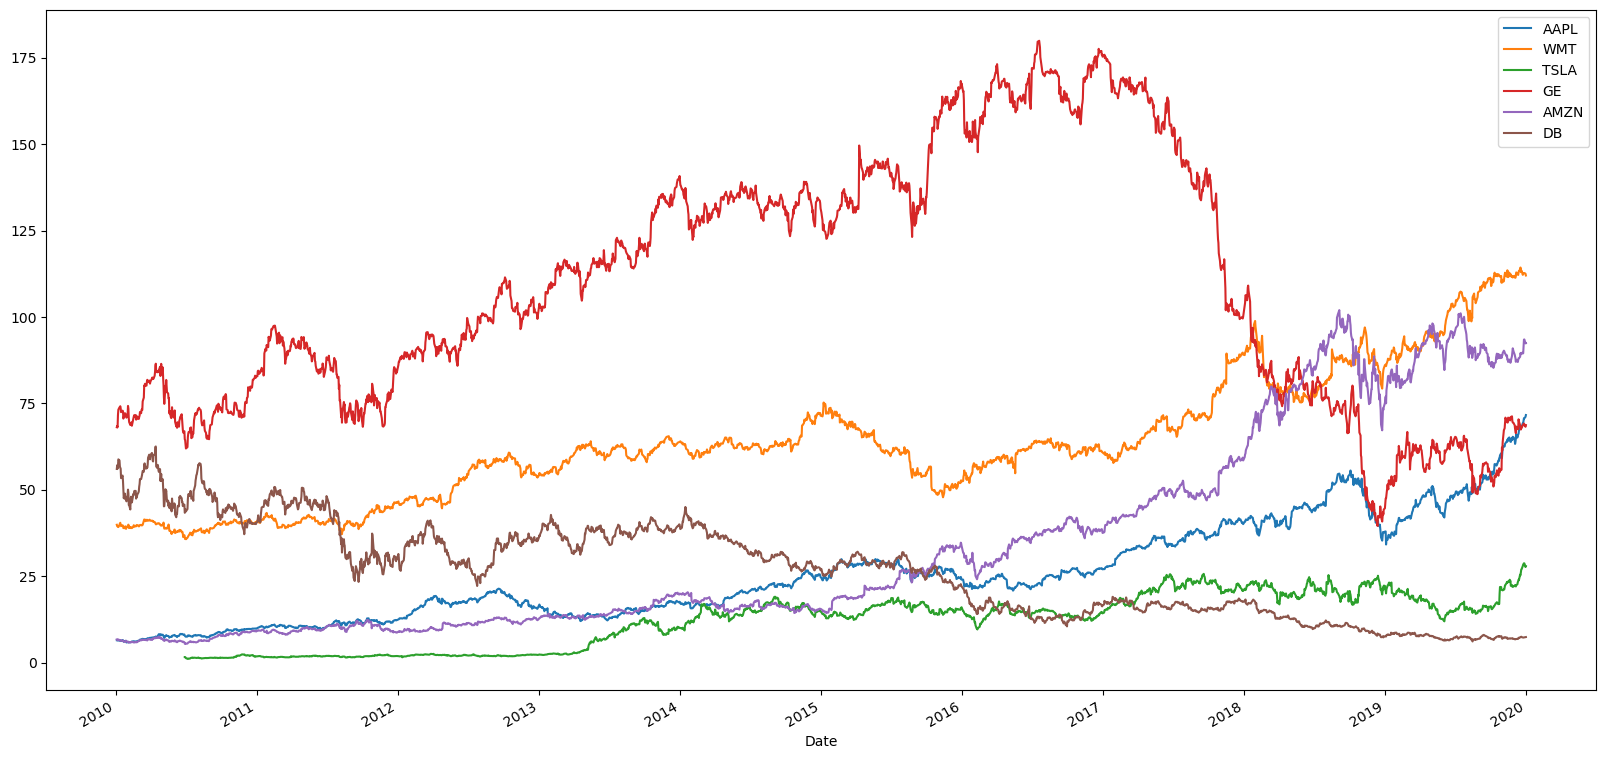

In [23]:
dataset = download_data()
show_data(dataset)

In [29]:
def calculate_return(data):
    log_return = np.log(data / data.shift(1 )) #s(t+1)-s(t) / s(t) but for convience we use log(s(t+1) / s(t))
    return log_return[1:]
log_daily_returns = calculate_return(dataset)

In [30]:
def show_statistics(returns):
    # instead of daily we are after annual
    # mean of annual 
    print(returns.mean() * num_trading_day)
    print(returns.cov() * num_trading_day)
    
show_statistics(log_daily_returns)

AAPL    0.240620
WMT     0.103481
TSLA    0.301474
GE      0.000923
AMZN    0.262990
DB     -0.203065
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.066465  0.010032  0.032112  0.021706  0.031673  0.033831
WMT   0.010032  0.029742  0.011548  0.011005  0.010925  0.016676
TSLA  0.032112  0.011548  0.262101  0.028371  0.045129  0.045099
GE    0.021706  0.011005  0.028371  0.069739  0.024305  0.047130
AMZN  0.031673  0.010925  0.045129  0.024305  0.095304  0.039302
DB    0.033831  0.016676  0.045099  0.047130  0.039302  0.158793


In [45]:
def show_mean_variance(returns, weights):
    portfolio_returns = np.sum(returns.mean()*weights) * num_trading_day
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*num_trading_day , weights)))
    
    print(f"Expected portfolio mean (return) : {portfolio_returns}")
    print(f"Expected portfolio volatility (risk) : {portfolio_volatility}")
    


In [46]:
def generate_portfolio(returns):
    portfolio_mean = []
    portfolio_risks = []
    portfolio_weights = []
    
    for _ in range(NUM_PORTFOLIO):
        
        w = np.random.random(len(stocks))
        w /= np.sum(w)
        portfolio_weights.append(w)
        
        portfolio_mean.append(np.sum(returns.mean() * w) * num_trading_day )
        
        portfolio_risks.append(np.sqrt(np.dot(w.T,np.dot(returns.cov()*num_trading_day , w))))
        
    
    return np.array(portfolio_weights), np.array(portfolio_mean), np.array(portfolio_risks)

pweights,means,risks = generate_portfolio(log_daily_returns)

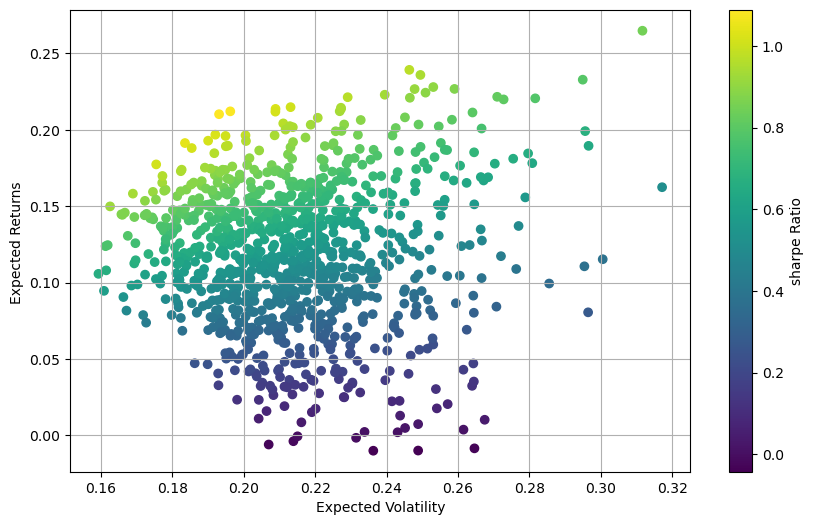

In [44]:
def show_portfolios(returns,volatility):
    plt.figure(figsize =(10,6))
    plt.scatter(volatility,returns, c=returns/volatility, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Returns ')
    plt.colorbar(label = 'sharpe Ratio')
    plt.show
    
show_portfolios(means,risks )
    


In [56]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean()*weights) * num_trading_day
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*num_trading_day , weights)))
    
    return np.array([ portfolio_return, portfolio_volatility,portfolio_return/portfolio_volatility ]) 

#scipy optimize module can find minimun of a function
#maximun of f(x) is the minimum of -f(x)

def min_function_sharpe(weights,returns):
    return -statistics(weights, returns)[2]

def optimize_portfolio(weights,returns):
    #sum of weights is 1
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    #the weights can be 1 atmost: 1 when 100% invested in single stock
    bounds = tuple((0,1) for _ in range(len(stocks)))
    
    return optimization.minimize(fun=min_function_sharpe, x0=weights[0],args=returns
                          ,method='SLSQP',bounds = bounds, constraints=constraints)

def print_optimal_portfolio(optimum, returns):
    print(f"optimal portfolio : {optimum['x'].round(3)}")
    print(f"Expected return,volatitly and sharpe ratio:{statistics(optimum['x'].round(3), returns)}")
    

def show_optimal_portfolios(opt,rets,portfolio_rets, portfolio_vol):
    plt.figure(figsize =(10,6))
    plt.scatter(portfolio_vol,portfolio_rets, c=portfolio_rets/portfolio_vol, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Returns ')
    plt.colorbar(label = 'sharpe Ratio')
    plt.plot(statistics(opt['x'], rets)[1],statistics(opt['x'], rets)[0],'g*',markersize=20)
    plt.show
    
    

    
    
    

optimal portfolio : [0.374 0.306 0.082 0.    0.239 0.   ]
Expected return,volatitly and sharpe ratio:[0.20923252 0.18210588 1.1489608 ]


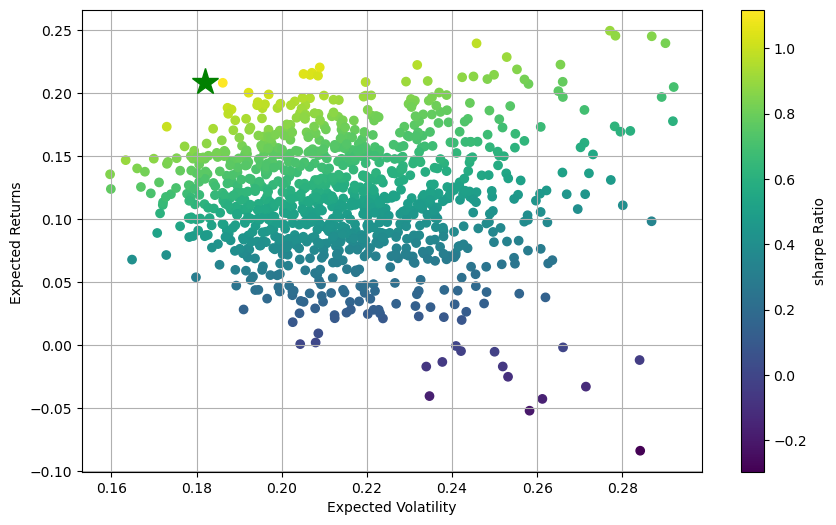

In [57]:
optimum = optimize_portfolio(pweights,log_daily_returns)
print_optimal_portfolio(optimum, log_daily_returns)
show_optimal_portfolios(optimum,log_daily_returns,portfolio_rets, portfolio_vol):


In [74]:
#understanding

weigths = pweights
returns = log_daily_returns

def optimize_portfolio(weights,returns):
    #sum of weights is 1
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    #the weights can be 1 atmost: 1 when 100% invested in single stock
    bounds = tuple((0,1) for _ in range(len(stocks)))
    print(optimization.minimize(fun=min_function_sharpe, x0=weights[0],args=returns
                          ,method='SLSQP',bounds = bounds, constraints=constraints))
    
    print(optimum['x'].round(3))
    

optimize_portfolio(weights,returns)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.148961075105161
       x: [ 3.738e-01  3.054e-01  8.173e-02  0.000e+00  2.391e-01
            0.000e+00]
     nit: 10
     jac: [-2.319e-05 -1.401e-06 -9.893e-05  6.752e-01  7.194e-05
            2.186e+00]
    nfev: 70
    njev: 10
[0.374 0.306 0.082 0.    0.239 0.   ]
